<h1 style="text-align: center; font-weight: bold; font-size: 60px;">

Sentiment Analysis Tool for Amazon Fine Food Reviews 

</h1>


<div style="width: 90%; text-justify: inter-word; margin: 0 auto; font-size: 20px;">

## **Introduction**
### **Motivation**

A sentiment prediction tool for Amazon Fine Food Reviews leverages natural language processing (NLP) to analyze customer opinions and extract insights into product perception and satisfaction. The motivation is to improve product development, automate review management, and monitor brand reputation by understanding customer sentiment. This is achieved by applying NLP techniques to classify and analyze text data from reviews, enabling businesses to make data-driven decisions and engage more effectively with customers.


### **Objective**
Build a model that accurately predicts the sentiment of customer reviews. The model should be able to identify positive and negative sentiment, and should be able to handle both neutral and mixed reviews.

## **Table of Contents**
1. [Introduction](#introduction)
2. [Problem Statement](#problem-statement)
3. [Data Description](#data-description)
4. [Methodology](#methodology)
5. [EDA - Amazon Reviews](#eda-amazon-reviews)
6. [NLP: preprocessing](#nlp-preprocessing)
7. [Model Building: RandomForestClassifier](#model-building-randomforestclassifier)
8. [Model Calibration](#model-calibration)
9. [Model Evaluation](#model-evaluation)
10. [Model Building: PassiveAggressiveClassifier](#model-building-passiveaggressiveclassifier)
11. [Model Evaluation](#model-evaluation-1)
12. [Model reusability](#model-reusability)
13. [Conclusion](#conclusion)
14. [References](#references)
15. [About the Author](#about-the-author)



## **Problem Statement**

Identify the key features that accurately predict customer sentiment in Amazon Fine Food Reviews using a natural language processing (NLP) model. The goal is to achieve at least 90% accuracy in sentiment classification and process reviews within 2 minutes per 1,000 reviews, leveraging a dataset of 10,000+ reviews.

## **Data Description**

### **Data Sources**
The dataset for this project is sourced from the [kaggle](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews) dataset.

### **Data Overview**

**Total Entries**: 568,454

**Columns**:

- **Id**: Unique identifier for each review.
- **ProductId**: Identifier for the product being reviewed.
- **UserId**: Identifier for the user who wrote the review.
- **ProfileName**: Name or profile of the user.
- **HelpfulnessNumerator**: Number of users who found the review helpful.
- **HelpfulnessDenominator**: Total number of users who were asked if the review was helpful.
- **Score**: Rating given by the user.
- **Time**: Timestamp of the review.
- **Summary**: Brief summary of the review.
- **Text**: Full text of the review.


## **Methodology**

This project follows a prescriptive methodology to prepare the data. The data is cleaned, preprocessed, and ready for modeling. The model is then trained and tested to identify the best model. The model is then stored in a pickle file for deployment.


</div>

# Import libraries

In [1]:
# uncomment this code to time the execution
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

  Using cached ipython_autotime-0.3.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached ipython_autotime-0.3.2-py2.py3-none-any.whl (7.0 kB)
time: 0 ns (started: 2024-08-14 17:52:12 +01:00)


In [2]:
import warnings

warnings.simplefilter(action='ignore')

time: 0 ns (started: 2024-08-14 17:52:12 +01:00)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

time: 9.27 s (started: 2024-08-14 17:52:12 +01:00)


## Read in Data into pandas DataFrame

### Outside Kaggle data loading

Use the code bellow outside of Kaggle to download and load the dataset into a Pandas Dataframe.

In [4]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import requests

time: 938 ms (started: 2024-08-14 17:52:21 +01:00)


In [5]:
#Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Define the dataset and the path where it will be saved
dataset = 'snap/amazon-fine-food-reviews'
path = './input' 

# Create the directory if it does not exist
if not os.path.exists(path):
    os.makedirs(path)

def download_dataset(dataset, path):
    try:
        print("Downloading dataset:", "It will take a little while... Be patient!", sep='\n')
        api.dataset_download_files(dataset, path=path, unzip=True)
        print("Dataset loaded successfully!")
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        
        # Try to check internet connectivity
        try:
            response = requests.get("https://www.google.com", timeout=5)
            response.raise_for_status()  # Raise an exception if there was a problem
            print("Internet connection seems to be working. The error might be related to the Kaggle server or dataset.")
        except requests.exceptions.RequestException as e:
            print(f"Internet connection error: {e}")
        except Exception as e:
            print(f"Error checking internet connection: {e}")

time: 31 ms (started: 2024-08-14 17:52:22 +01:00)


In [6]:
download_dataset(dataset, path)

# Load the data into a Pandas DataFrame
try:
    df = pd.read_csv(os.path.join(path, 'Reviews.csv'))
    print("Dataset loaded successfully into a Pandas DataFrame!")
except FileNotFoundError:
    print(f"Error: 'Reviews.csv' not found in the downloaded dataset.")
except Exception as e:
    print(f"Error loading dataset into DataFrame: {e}") 

It will take a little while... Be patient!
Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
Dataset loaded successfully!
Dataset loaded successfully into a Pandas DataFrame!
time: 1min 34s (started: 2024-08-14 17:52:22 +01:00)


### Inside Kaggle data loading

Load the dataset from the working directory into a Pandas Dataframe.

In [7]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

time: 0 ns (started: 2024-08-14 17:53:57 +01:00)


In [11]:
df = pd.read_csv('input/Reviews.csv')

time: 4 s (started: 2024-08-14 17:56:36 +01:00)


In [13]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


time: 31 ms (started: 2024-08-14 17:56:40 +01:00)


# EDA - Amazon Reviews

In [14]:
# info on the data types and counts of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
time: 282 ms (started: 2024-08-14 17:56:40 +01:00)


In [15]:
count_products_unique = df.ProductId.nunique()
print(f"We have {count_products_unique: ,} unique products.")

We have  74,258 unique products.
time: 47 ms (started: 2024-08-14 17:56:40 +01:00)


In [16]:
# Each product's number of reviews: 
count_reviews_per_product = df.groupby(by='ProductId').UserId.count().sort_values(ascending=False)

time: 141 ms (started: 2024-08-14 17:56:41 +01:00)


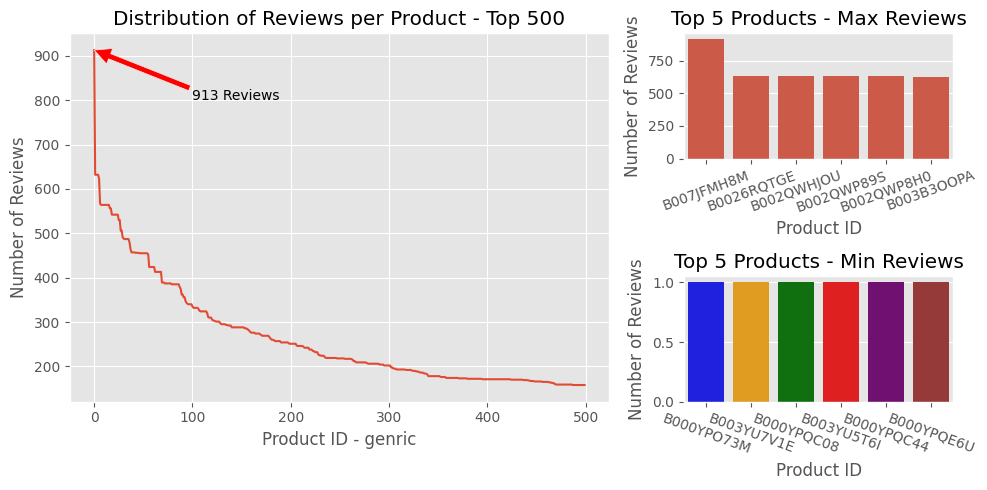

time: 657 ms (started: 2024-08-14 17:56:41 +01:00)


In [17]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[:, 0])
n = len(count_reviews_per_product[:500])
sns.lineplot(y=count_reviews_per_product[:500], x=list(range(n)), ax=ax1)
ax1.set_title('Distribution of Reviews per Product - Top 500')
ax1.set_xlabel('Product ID - genric')
ax1.set_ylabel('Number of Reviews')
plt.annotate(
    '913 Reviews',  # Text
    xy=(0, 913),  # Point to annotate
    xytext=(100, 800),  # Text location
    arrowprops=dict(facecolor='red')  # Arrow properties
)

ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(y=count_reviews_per_product[:6], x=count_reviews_per_product[:6].index, ax=ax2)
plt.xticks(rotation=20)
ax2.set_title('Top 5 Products - Max Reviews')
ax2.set_xlabel('Product ID')
ax2.set_ylabel('Number of Reviews')

ax3 = fig.add_subplot(gs[1, 1])
palette = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
sns.barplot(y=count_reviews_per_product[-7:-1], x=count_reviews_per_product[-7:-1].index, ax=ax3, palette=palette)
plt.xticks(rotation=-20)
ax3.set_title('Top 5 Products - Min Reviews')
ax3.set_xlabel('Product ID')
ax3.set_ylabel('Number of Reviews')

plt.tight_layout()

plt.show()

**Comment**:

We can see clearly that very few products have lots of reviews and the discrepancies between reviews for the top reviews both min and max are widely seperate. This is helpful for us to be aware when buliding and training our model.

In [18]:
# calculate percentages of each star review
pct_reviews = df.Score.value_counts() * 100 / df.Score.value_counts().sum()

# merge the percentages and the corresponding star into a dictionary
pct_dict = dict(zip(pct_reviews.keys(), pct_reviews.values))

time: 16 ms (started: 2024-08-14 17:56:41 +01:00)


In [19]:
# calculate the number of reviews made by each User
userid_count = df.groupby(by='UserId').UserId.count()

time: 562 ms (started: 2024-08-14 17:56:41 +01:00)


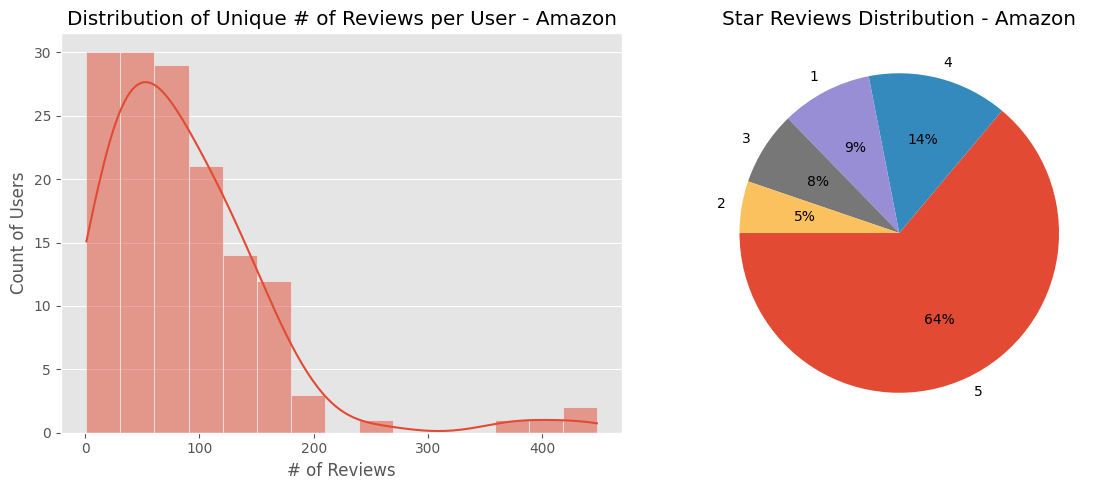

time: 375 ms (started: 2024-08-14 17:56:42 +01:00)


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(userid_count.unique(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Unique # of Reviews per User - Amazon')
axes[0].set_xlabel('# of Reviews')
axes[0].set_ylabel('Count of Users')
axes[0].grid(axis='x') # remove vertical grid lines

axes[1].pie(pct_reviews, labels=pct_dict, startangle=180, autopct='%1.0f%%')
axes[1].set_title('Star Reviews Distribution - Amazon')

plt.tight_layout()
plt.show()

**Comment**:

It appears that users who write reviews a lot are very few in comparaison to those who write few reviews. This could be due to product popularity among consumers. In addition, the distribution of star reviews is highly biased towards 5-stars. We should be careful with this data because it can transform bias to our model.

# NLP: Preprocessing

## Morphological Analysis

### Transform ratings' range

In [21]:
# 0 being negative review
# 1 being neutral reviews
# 2 being positive reviews 

def update_score(score):
    if score <= 2:
        return 0
    elif score == 3:
        return 1
    else:
        return 2

time: 0 ns (started: 2024-08-14 17:56:42 +01:00)


In [22]:
df['new_score'] = df.Score.apply(update_score)

time: 312 ms (started: 2024-08-14 17:56:42 +01:00)


### Re-sampling: Balance Reviews to minimize Bias

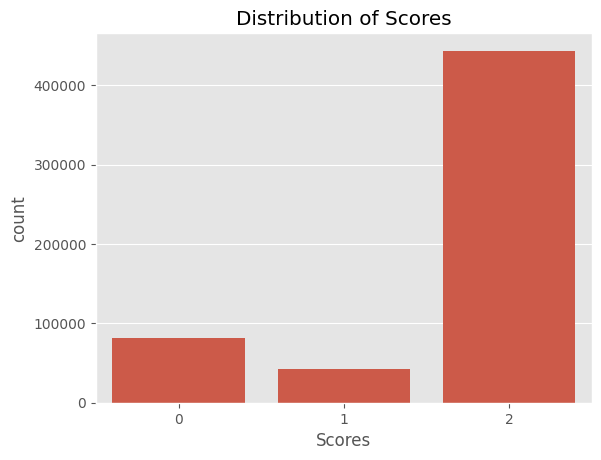

time: 125 ms (started: 2024-08-14 17:56:43 +01:00)


In [23]:
df_val_counts = df.new_score.value_counts()

df.new_score.value_counts()
sns.barplot(x=df_val_counts.index, y=df_val_counts)
plt.xlabel('Scores')
plt.title('Distribution of Scores')
plt.show()

In [24]:
balanced_df = pd.DataFrame(columns=df.columns)
grouped = df.groupby(by='new_score')

# set the minimum number of reviews across all categories
min_count = df.new_score.value_counts()[1] # minimum count of all scores is score 1

# Sample the minimum number of reviews from each category and append to the balanced DataFrame
for score, group in grouped:
    sampled_group = group.sample(n=min_count, random_state=42)
    balanced_df = pd.concat([balanced_df, sampled_group], ignore_index=True)

# Shuffle the balanced DataFrame (optional)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

time: 532 ms (started: 2024-08-14 17:56:43 +01:00)


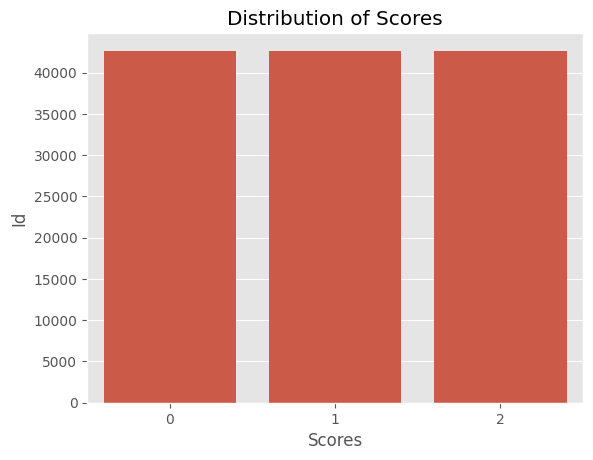

time: 218 ms (started: 2024-08-14 17:56:43 +01:00)


In [25]:
# we can verify that our reviews now are balanced in terms of size
df_val_counts_balanced = balanced_df.groupby('new_score').Id.count()

sns.barplot(x=df_val_counts_balanced.index, y=df_val_counts_balanced)
plt.xlabel('Scores')
plt.title('Distribution of Scores')
plt.show()

### Limiting dataset

In [26]:
total_reviews = df.shape[0]

print(f"We have a total of {total_reviews: ,} reviews in our dataset.")

We have a total of  568,454 reviews in our dataset.
time: 0 ns (started: 2024-08-14 17:56:44 +01:00)


In [27]:
total_reviews_balanced = balanced_df.shape[0]

short_df = balanced_df
print(f"We have a total of {total_reviews_balanced: ,} reviews in our balanced dataset.")

We have a total of  127,920 reviews in our balanced dataset.
time: 0 ns (started: 2024-08-14 17:56:44 +01:00)


### Filter corpus

In [28]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
            'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' '] # space here acts like a natural separator

# Filter corpus to only inlcude english alphabets and replace non-word characters to space including punctuations
def filter_corpus(document):
    filtered_doc = ''.join([char if char in alphabet else ' ' for char in document.lower()])
    return ' '.join(filtered_doc.split())

time: 0 ns (started: 2024-08-14 17:56:44 +01:00)


In [29]:
short_df.Text = short_df.Text.apply(filter_corpus)

time: 28.4 s (started: 2024-08-14 17:56:44 +01:00)


### Remove punctuations

In [30]:
import string
import unicodedata

all_punctuation = {c for c in string.punctuation}
all_punctuation |= {c for c in map(chr, range(0x2000, 0x206F + 1)) if unicodedata.category(c).startswith('P')}
all_punctuation |= {c for c in map(chr, range(0x2070, 0x209F + 1)) if unicodedata.category(c).startswith('P')}
all_punctuation |= {c for c in map(chr, range(0x3000, 0x303F + 1)) if unicodedata.category(c).startswith('P')}

# remove all punctuations that are not utf-8 
def rmv_puncs(document):
    cleaned_doc = ''.join([char for char in document if char not in all_punctuation])
    return ' '.join(cleaned_doc.split())

time: 16 ms (started: 2024-08-14 17:57:12 +01:00)


In [31]:
# apply rmv_puncs function
short_df.Text = short_df.Text.apply(rmv_puncs)

time: 8.69 s (started: 2024-08-14 17:57:12 +01:00)


### Tokenize

In [32]:
from nltk.tokenize import TreebankWordTokenizer

# tokenize the text
def tokenizer(text):
    return TreebankWordTokenizer().tokenize(text.lower())

time: 0 ns (started: 2024-08-14 17:57:21 +01:00)


In [33]:
# apply tokenize function
short_df['tokens'] = short_df.Text.apply(tokenizer)

time: 38.9 s (started: 2024-08-14 17:57:21 +01:00)


### Remove Stop words: custom

We will not remove all stop words from the corpus because sometimes those stop words carry a piece of information that our model can benefit from.

For example if a user says: 'Not Bad' this automatically mean 'Good' and we need  our model to learn from situations like these.

In [34]:
from nltk.corpus import stopwords

# standard stop words list
standard_stop_words = set(stopwords.words('english'))

# List of important stop words to retain in our case
important_stop_words = {'not', 'no', 'but', 'against', 'don', "don't", 'won', "won't", 'isn', "isn't", 'aren', "aren't", 'couldn',
                        "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
                        'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                        "wasn't", 'weren', "weren't", 'wouldn', "wouldn't"}

# Custom stop words list
custom_stop_words = standard_stop_words - important_stop_words

time: 16 ms (started: 2024-08-14 17:58:00 +01:00)


In [35]:
# apply rmv_stopwords function
def rmv_stopwords(tokens):
    return [token for token in tokens if token not in custom_stop_words]

time: 0 ns (started: 2024-08-14 17:58:00 +01:00)


In [36]:
#apply rmv_stopwords function
short_df.tokens = short_df.tokens.apply(rmv_stopwords)

time: 2.78 s (started: 2024-08-14 17:58:00 +01:00)


### Remove additional noise

In [37]:
# remove all tokens that has  less than 2 characters
def rmv_noise(tokens):
    return [token for token in tokens if len(token) > 2]

time: 0 ns (started: 2024-08-14 17:58:03 +01:00)


In [38]:
short_df.tokens = short_df.tokens.apply(rmv_noise)

time: 1.81 s (started: 2024-08-14 17:58:03 +01:00)


### Advanced stemming: Lemmatization

In [39]:
from nltk.stem import WordNetLemmatizer

#nltk.download('wordnet') 
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

def lemmatizer(tokens):
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(token) for token in tokens]

# to test the object:
#wnl = WordNetLemmatizer()
#print(wnl.lemmatize('dogs'))

time: 0 ns (started: 2024-08-14 17:58:04 +01:00)


In [40]:
short_df['lemmas'] = short_df.tokens.apply(lemmatizer)

time: 32.9 s (started: 2024-08-14 17:58:04 +01:00)


### Reconstruct Text

In [41]:
# Reconstruct text after cleaning it
def reconstruct_text(lemmas):
    return ' '.join(lemmas)

time: 0 ns (started: 2024-08-14 17:58:37 +01:00)


In [42]:
short_df.Text = short_df.lemmas.apply(reconstruct_text)

time: 391 ms (started: 2024-08-14 17:58:37 +01:00)


# Model Building: RandomForestClassifier

## Train-Test data splitting

In [43]:
# we will subdivide our dataset to training set, testing set and we will keep a calibration set for our calibration.
train_size = 0.6
calib_size = 0.05
test_size = 1 - train_size - calib_size  # 0.35

time: 0 ns (started: 2024-08-14 17:58:38 +01:00)


In [44]:
from sklearn.model_selection import train_test_split

X = short_df.Text
y = short_df.new_score.astype(int)

time: 16 ms (started: 2024-08-14 17:58:38 +01:00)


In [45]:
# Training with calibration dataset and Testing Dataset
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X,
                                                                y,
                                                                test_size=test_size,
                                                                random_state=42)

time: 15 ms (started: 2024-08-14 17:58:38 +01:00)


In [46]:
# Training Dataset and Calibration Dataset
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib,
                                                      y_train_calib,
                                                      test_size=calib_size/(1 - test_size), 
                                                      random_state=42)

time: 31 ms (started: 2024-08-14 17:58:38 +01:00)


In [47]:
data_shape = [X_train.shape[0], X_test.shape[0], X_calib.shape[0]]
data_name = ['Train', 'Test', 'Calibration']

time: 0 ns (started: 2024-08-14 17:58:38 +01:00)


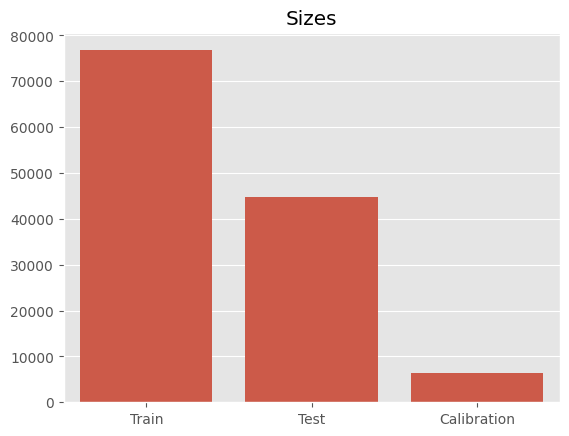

time: 266 ms (started: 2024-08-14 17:58:38 +01:00)


In [48]:
sns.barplot(x=data_name, y=data_shape)
plt.title('Sizes')
plt.show()

## Pipeline Building

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, classification_report, log_loss

time: 688 ms (started: 2024-08-14 17:58:38 +01:00)


In [50]:
# Define a pipeline combining CountVectorizer and OneVsRestClassifier
# change the number of estimators according to your machine power (ps: 1,000 is more than enough.)
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 3))),
    ('classifier', RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, criterion='log_loss'))
])

time: 0 ns (started: 2024-08-14 17:58:39 +01:00)


### Model Fitting

In [51]:
# train the model
model = pipeline.fit(X_train, y_train)

time: 7min 24s (started: 2024-08-14 17:58:39 +01:00)


In [52]:
# get probabilistic predictions (voting percentages)
test_probs = model.predict_proba(X_test)

# get hard predictions 
hard_preds = model.predict(X_test) 

time: 19.1 s (started: 2024-08-14 18:06:03 +01:00)


### Model evaluation

In [53]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, hard_preds)}')
print(f'Log-Loss: {log_loss(y_test, test_probs)}')

print(classification_report(y_test, hard_preds))

Accuracy: 0.6944587139570724
Log-Loss: 1.0994604983460243
              precision    recall  f1-score   support

           0       0.67      0.74      0.71     14797
           1       0.71      0.58      0.64     14968
           2       0.70      0.76      0.73     15008

    accuracy                           0.69     44773
   macro avg       0.70      0.69      0.69     44773
weighted avg       0.70      0.69      0.69     44773

time: 187 ms (started: 2024-08-14 18:06:22 +01:00)


# Model Calibration

## Assessing Calibration: Reliability diagrams

In [54]:
try:
    import ml_insights as mli 
except:
    !pip install ml_insights
    import ml_insights as mli 

time: 360 ms (started: 2024-08-14 18:06:22 +01:00)


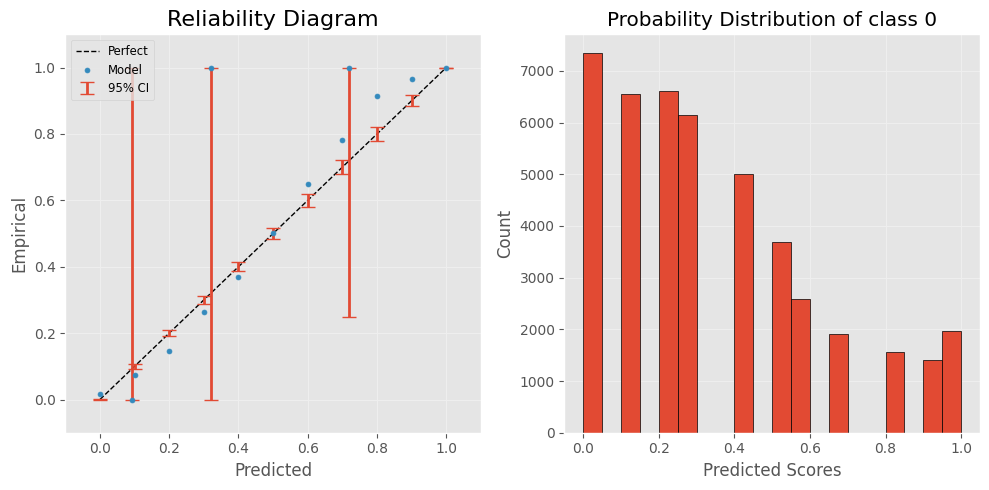

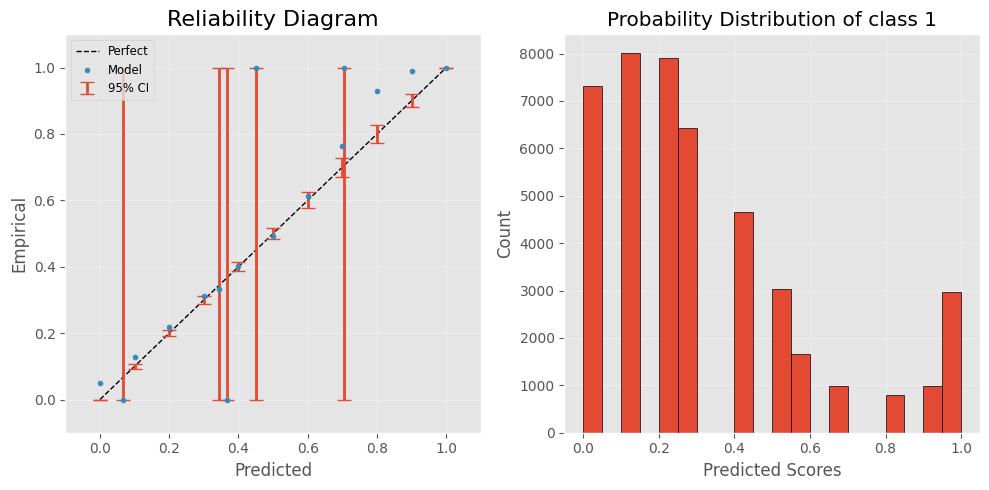

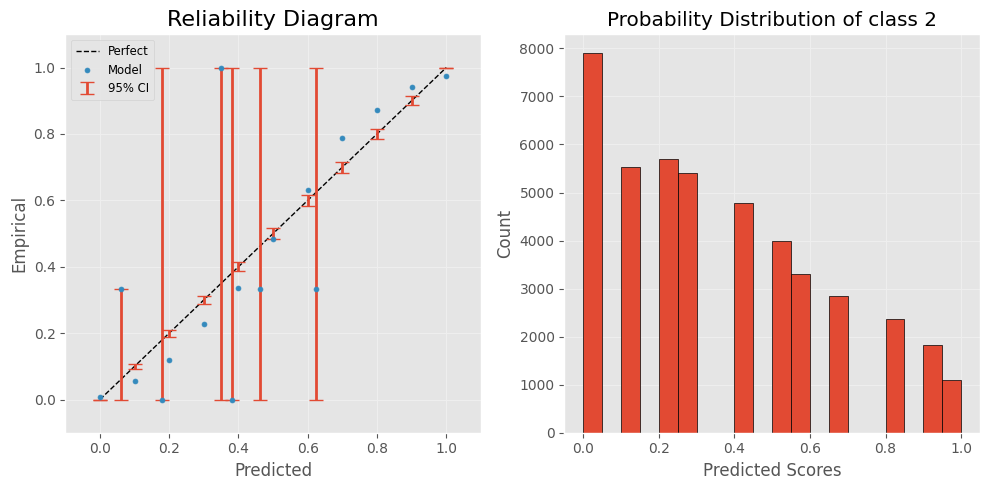

time: 2.3 s (started: 2024-08-14 18:06:23 +01:00)


In [55]:
# Plot reliability diagrams for each class
# we use the test_probs and not the hard predictions
for i in range(test_probs.shape[1]):
    fig = plt.figure(figsize=(10, 5)) 
    mli.plot_reliability_diagram(y_test == i, test_probs[:, i], show_histogram=True)
    plt.title(f'Probability Distribution of class {i}')
    plt.tight_layout()
    
plt.show()

The **Reliability Diagram** of our RandomForestClassifier seems to be not well calibrated.

We can observe that some data points are outside the CI and there is a consistent over predicting in small values and over predicting in larger values.


## Calibrating model

### Method 1: Platt Scaling
Assumes that there is a logistic relationship between the scores $z$ and the true probability $p$.

$\log\left(\frac{p}{1-p}\right) = \alpha + \beta z$

$p = \frac{1}{1+\exp(-(\alpha + \beta z))}$

So it fits the two parameters $\alpha$ and $\beta$ just like in logistic regression!

- Very restrictive set of possible functions
- Needs very little data
- Historically, came from the observation (and subsequent theoretical arguments) that a logistic regression was the "right" calibration for Support Vector Machines

Reference: Platt, J. (1999). Probabilistic outputs for support vector machines and comparison to regularized likelihood methods. Advances in Large Margin Classifiers (pp.61–74).

In [56]:
from sklearn.linear_model import LogisticRegression

# Fit Platt scaling (logistic calibration)
# the big C nubmber is to unregularize the model (simply to turn-off the regularization)
lr = LogisticRegression(C=99_999_999_999, solver='lbfgs', n_jobs=-1)
lr.fit(test_probs, y_test)

# get the calibration-set probabilistic predictions
calib_probs = model.predict_proba(X_calib)

# calibrated calibration-set probabilistic predictions
calib_preds_calibrated = lr.predict_proba(calib_probs)

time: 4.49 s (started: 2024-08-14 18:06:25 +01:00)


#### Calibrated model: Evaluation

In [57]:
# Evaluate the model
hard_preds_calib = model.predict(X_calib)
print(f'Accuracy: {accuracy_score(y_calib, hard_preds_calib)}')
print(f'Log-Loss: {log_loss(y_calib, calib_preds_calibrated)}')

print(classification_report(y_calib, hard_preds_calib))

Accuracy: 0.6943402126328956
Log-Loss: 0.6836091740610061
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      2140
           1       0.71      0.57      0.64      2152
           2       0.71      0.76      0.73      2104

    accuracy                           0.69      6396
   macro avg       0.70      0.69      0.69      6396
weighted avg       0.70      0.69      0.69      6396

time: 1.48 s (started: 2024-08-14 18:06:30 +01:00)


Teh **Log-Loss** has decreased in comparaison to the the one measured for the uncalibrated model.

#### Calibrated model: Reliability diagrams

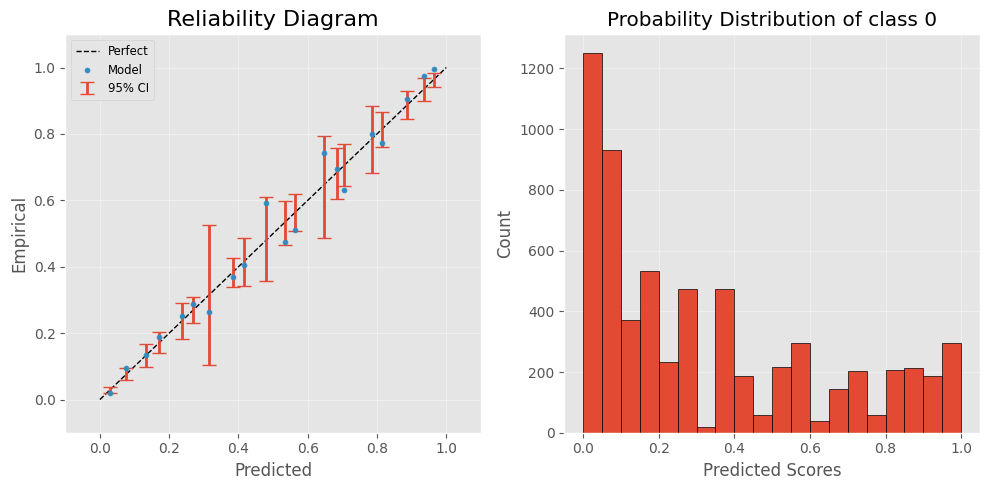

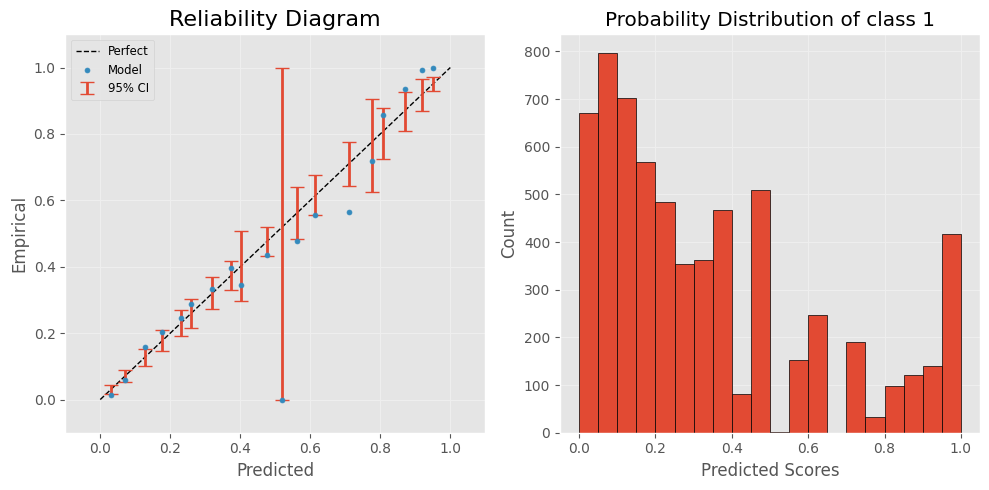

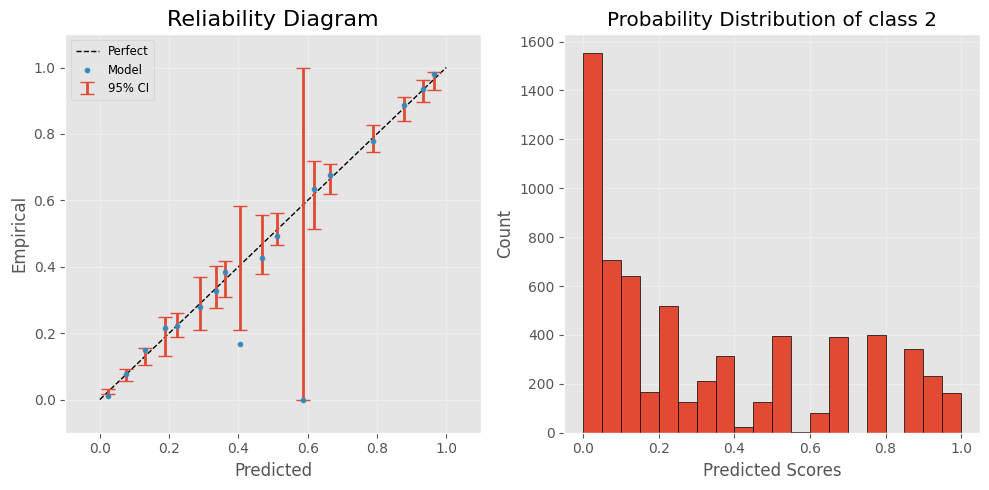

time: 1.88 s (started: 2024-08-14 18:06:31 +01:00)


In [58]:
# Plot reliability diagrams for each class
for i in range(calib_probs.shape[1]):
    fig = plt.figure(figsize=(10, 5)) 
    mli.plot_reliability_diagram(y_calib == i, calib_preds_calibrated[:, i], show_histogram=True)
    plt.title(f'Probability Distribution of class {i}')
    plt.tight_layout()
    
plt.show()

We can observe that after calibration, we tend to fall in the acceptable region where we do not over predict nor under predict.

We also notice some jumping behaviors of certain data points but it is mainly due to small bin values which is verified by the **Probability distribution diagram** in the right.

#### Calibrated model: Testing

##### Test data

In [59]:
reviews = [
    "This coffee has a rich and robust flavor that I absolutely love. It's my go-to every morning, and I can't imagine starting my day without it. The aroma is invigorating, and the taste is smooth without any bitterness. I appreciate the sustainable sourcing, which makes me feel good about my purchase. Definitely a staple in my pantry.",
    "The pasta was okay, but I didn't find it to be anything special. It cooked well and had an acceptable texture, but the flavor was somewhat bland. I've had better from other brands at a similar price point. It's not terrible, but I wouldn't go out of my way to buy it again. It serves its purpose but doesn't stand out.",
    "I was very disappointed with this tea. It tasted stale and did not have the aroma I expected. I usually enjoy a strong, fragrant cup of tea, but this one fell flat. Even after steeping it longer than usual, the flavor was weak and uninspiring. I will not be purchasing this brand again, as it does not live up to its description.",
    "These cookies are fantastic! They have the perfect amount of sweetness and a great texture. Each bite is delightful, with a nice balance between the crunchiness of the cookie and the softness of the filling. I also appreciate the high-quality ingredients used. These cookies have quickly become a favorite treat in my household.",
    "The olive oil is good, but I've had better. It's a decent option for the price, with a pleasant enough flavor for everyday cooking. However, it lacks the depth and richness that I've experienced with some premium brands. It's a solid choice if you're on a budget, but don't expect it to elevate your dishes significantly.",
    "The chocolate was too bitter for my taste, and I didn't enjoy it at all. I generally like dark chocolate, but this one was overwhelmingly bitter and left an unpleasant aftertaste. The texture was also a bit chalky. I tried to use it in baking to see if it would be better, but it still didn't meet my expectations.",
    "I love this granola! It's crunchy, flavorful, and perfect for breakfast or a snack. The mix of nuts and dried fruits adds a wonderful variety of textures and flavors. It's not overly sweet, which I appreciate, and it's great with yogurt or milk. I've even started carrying a small bag with me for a quick, healthy snack on the go.",
    "The sauce was mediocre. It lacked the depth of flavor I was hoping for and was somewhat watery. It did the job for a quick weeknight meal, but I found myself needing to add additional spices and ingredients to make it more palatable. It's not bad, but there are definitely better options available.",
    "This honey is amazing! It's smooth, rich, and has a wonderful floral note that adds a unique touch to everything I use it in. Whether it's in tea, on toast, or as part of a recipe, this honey never disappoints. The quality is evident from the first taste, and I love that it's sourced from local, organic farms.",
    "The chips were stale and didn't taste fresh. I wouldn't buy them again. When I opened the bag, I was immediately struck by the lack of crispness. The flavor was also off, almost as if they had been sitting on the shelf for too long. This was a disappointing purchase, and I had to throw most of the bag away."
]

# True scores
scores = [2, 1, 0, 2, 1, 0, 2, 1, 2, 0]

time: 0 ns (started: 2024-08-14 18:06:33 +01:00)


##### Probabilities comparaison

Uncalibrated Vs. Calibrated Probabilities for our test data

In [60]:
rev_df = pd.DataFrame(reviews, columns=['reviews'])

time: 0 ns (started: 2024-08-14 18:06:33 +01:00)


In [61]:
def clean_document(doc):
    document = filter_corpus(doc)
    document = rmv_puncs(document)
    tokens = tokenizer(document)
    tokens = rmv_stopwords(tokens)
    tokens = rmv_noise(tokens)
    lemmas = lemmatizer(tokens)
    text = reconstruct_text(lemmas)
    return text

time: 0 ns (started: 2024-08-14 18:06:33 +01:00)


In [62]:
cleaned_reviews = rev_df.reviews.apply(clean_document)

time: 0 ns (started: 2024-08-14 18:06:33 +01:00)


In [63]:
uncal_prob = model.predict_proba(cleaned_reviews)
print('Uncalibrated Prob:')
pd.DataFrame(uncal_prob)

Uncalibrated Prob:


,0,1,2
0,0.0,0.1,0.9
1,0.3,0.6,0.1
2,0.5,0.4,0.1
3,0.0,0.0,1.0
4,0.0,0.6,0.4
5,0.5,0.1,0.4
6,0.2,0.1,0.7
7,0.3,0.4,0.3
8,0.0,0.0,1.0
9,0.8,0.2,0.0


time: 140 ms (started: 2024-08-14 18:06:33 +01:00)


In [64]:
cal_prob = lr.predict_proba(uncal_prob)
print('Calibrated Prob:')
pd.DataFrame(cal_prob)

Calibrated Prob:


,0,1,2
0,0.017803,0.050474,0.931722
1,0.222652,0.701434,0.075913
2,0.529380,0.398861,0.071758
3,0.011664,0.024958,0.963378
4,0.055788,0.645967,0.298245
5,0.538593,0.174446,0.286961
6,0.094836,0.112896,0.792268
7,0.274454,0.492486,0.233059
8,0.011664,0.024958,0.963378
9,0.878506,0.102579,0.018915


time: 16 ms (started: 2024-08-14 18:06:33 +01:00)


##### Evaluation

In [65]:
hard_preds_sample_uncalib = model.predict(cleaned_reviews)
hard_preds_sample_calib = lr.predict(uncal_prob)

time: 78 ms (started: 2024-08-14 18:06:33 +01:00)


In [66]:
# Evaluate the model
print('Uncalibrated model:')
print(f'Accuracy: {accuracy_score(scores, hard_preds_sample_uncalib)}')
print(f'Log-Loss: {log_loss(scores, uncal_prob)}')

Uncalibrated model:
Accuracy: 1.0
Log-Loss: 0.4009415351436797
time: 0 ns (started: 2024-08-14 18:06:33 +01:00)


In [67]:
# Evaluate the model
print('Calibrated model:')
print(f'Accuracy: {accuracy_score(scores, hard_preds_sample_calib)}')
print(f'Log-Loss: {log_loss(scores, cal_prob)}')

Calibrated model:
Accuracy: 1.0
Log-Loss: 0.32624941089881687
time: 15 ms (started: 2024-08-14 18:06:33 +01:00)


### Method 2: SplineCalib 
- SplineCalib fits a cubic smoothing spline to the relationship between the uncalibrated scores and the calibrated probabilities
- Smoothing splines strike a balance between fitting the points well and having a smooth function
- SplineCalib uses a smoothed logistic function - so the fit to data is measured by likelihood (i.e. log-loss) and the smoothness refers to the integrated second derivative **before** the logistic transformation.
- There is a nuisance parameter that trades off smoothness for fit.  At one extreme it will revert to standard logistic regression (i.e. Platt scaling) and at the other extreme it will be a very wiggly function that fits the data but does not generalize well.

- SplineCalib automatically fits the nuisance parameter (though this can be adjusted by the user)
- The resulting calibration function is not necessarily monotonic.  (In some cases this may be beneficial).

References: Lucena, B. Spline-based Probability Calibration. https://arxiv.org/abs/1809.07751

In [68]:
calib_mc = mli.SplineCalib(unity_prior=False)
calib_mc.fit(test_probs, y_test, verbose=True)

# calibrated calibration-set probabilistic predictions 
calib_preds_calibrated_spl = calib_mc.calibrate(calib_probs)

Calibrating Class 0
Calibrating Class 1
Calibrating Class 2
time: 24.3 s (started: 2024-08-14 18:06:33 +01:00)


#### Calibrated model: Evaluation

In [69]:
# Evaluate the model
hard_preds_calib_spl = model.predict(X_calib)
print(f'Accuracy: {accuracy_score(y_calib, hard_preds_calib_spl)}')
print(f'Log-Loss: {log_loss(y_calib, calib_preds_calibrated_spl)}')

print(classification_report(y_calib, hard_preds_calib_spl))

Accuracy: 0.6943402126328956
Log-Loss: 0.6947265818199836
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      2140
           1       0.71      0.57      0.64      2152
           2       0.71      0.76      0.73      2104

    accuracy                           0.69      6396
   macro avg       0.70      0.69      0.69      6396
weighted avg       0.70      0.69      0.69      6396

time: 1.62 s (started: 2024-08-14 18:06:58 +01:00)


#### Calibrated model: Reliability diagrams

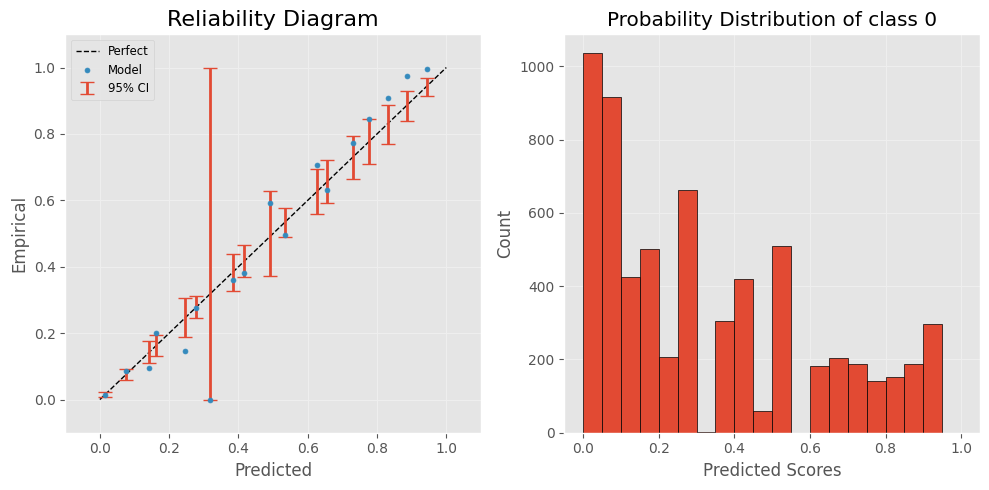

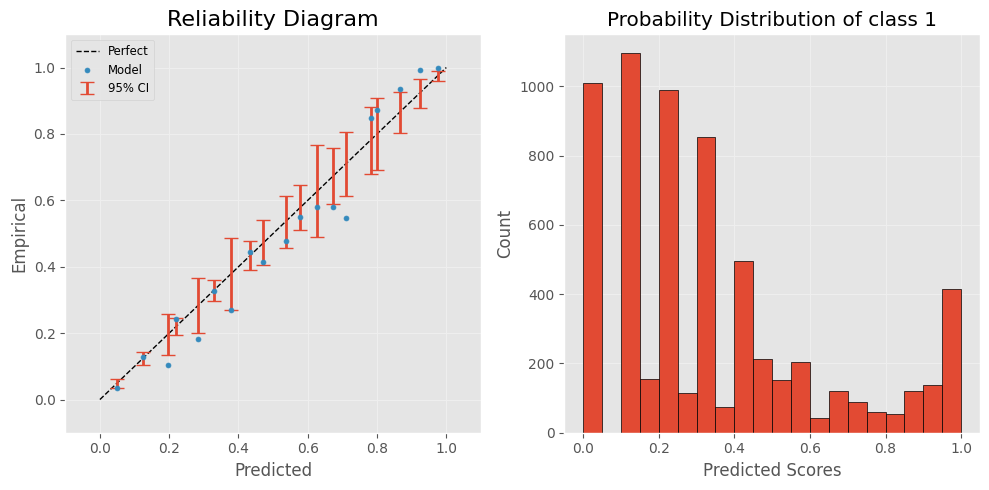

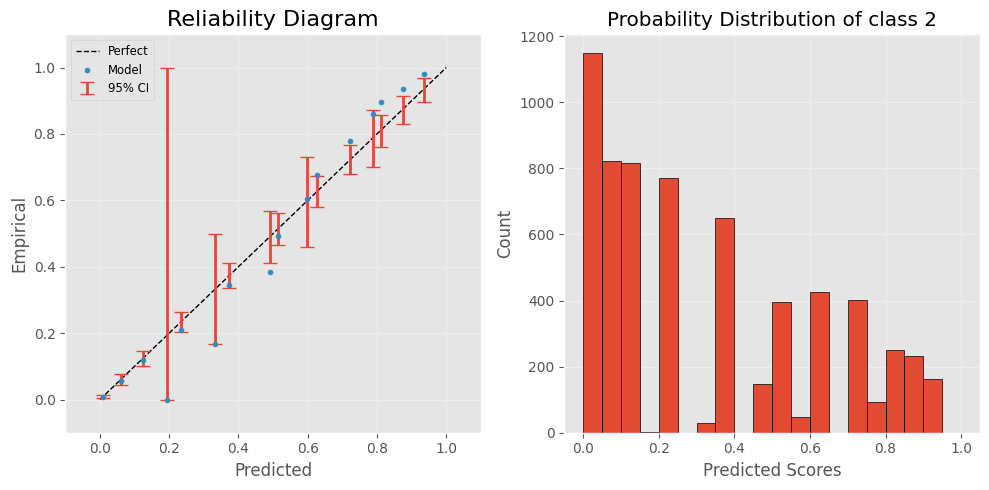

time: 1.88 s (started: 2024-08-14 18:06:59 +01:00)


In [70]:
# Plot reliability diagrams for each class
for i in range(calib_probs.shape[1]):
    fig = plt.figure(figsize=(10, 5)) 
    mli.plot_reliability_diagram(y_calib == i, calib_preds_calibrated_spl[:, i], show_histogram=True)
    plt.title(f'Probability Distribution of class {i}')
    plt.tight_layout()
    
plt.show()

#### Calibrated model: Testing

##### Probabilities comparaison 

Uncalibrated Vs. Calibrated Probabilities for our test data

In [71]:
uncal_prob = model.predict_proba(cleaned_reviews)
print('Uncalibrated Prob:')
pd.DataFrame(uncal_prob)

Uncalibrated Prob:


,0,1,2
0,0.0,0.1,0.9
1,0.3,0.6,0.1
2,0.5,0.4,0.1
3,0.0,0.0,1.0
4,0.0,0.6,0.4
5,0.5,0.1,0.4
6,0.2,0.1,0.7
7,0.3,0.4,0.3
8,0.0,0.0,1.0
9,0.8,0.2,0.0


time: 63 ms (started: 2024-08-14 18:07:01 +01:00)


In [72]:
cal_prob_spl = calib_mc.predict_proba(uncal_prob)
print('Calibrated Prob:')
pd.DataFrame(cal_prob_spl)

Calibrated Prob:


,0,1,2
0,0.014955,0.118158,0.866886
1,0.269558,0.664949,0.065493
2,0.523856,0.412771,0.063373
3,0.015676,0.049178,0.935146
4,0.016504,0.632235,0.351260
5,0.516601,0.130869,0.352530
6,0.142092,0.123538,0.734370
7,0.291926,0.461972,0.246103
8,0.015676,0.049178,0.935146
9,0.798458,0.193847,0.007694


time: 16 ms (started: 2024-08-14 18:07:01 +01:00)


##### Evaluation

In [73]:
hard_preds_sample_uncalib = model.predict(reviews) #np.argmax(uncal_prob, axis=1)
hard_preds_sample_calib_spl = np.argmax(cal_prob_spl, axis=1)

time: 62 ms (started: 2024-08-14 18:07:01 +01:00)


In [74]:
# Evaluate the model
print('Uncalibrated model:')
print(f'Accuracy: {accuracy_score(scores, hard_preds_sample_uncalib)}')
print(f'Log-Loss: {log_loss(scores, uncal_prob)}')

Uncalibrated model:
Accuracy: 0.9
Log-Loss: 0.4009415351436797
time: 0 ns (started: 2024-08-14 18:07:01 +01:00)


In [75]:
# Evaluate the model
print('Calibrated model:')
print(f'Accuracy: {accuracy_score(scores, hard_preds_sample_calib_spl)}')
print(f'Log-Loss: {log_loss(scores, cal_prob_spl)}')

Calibrated model:
Accuracy: 1.0
Log-Loss: 0.3756580683863693
time: 0 ns (started: 2024-08-14 18:07:01 +01:00)


# Model Evaluation

Evaluate our model on testset

In [76]:
X_t = cleaned_reviews
y_t = pd.Series(scores).astype(int)

# Predicting
predictions = model.predict(X_t)
predictions_proba = model.predict_proba(X_t)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_true=y_t, y_pred=predictions)}')
print(f'Log-Loss: {log_loss(y_true=y_t, y_pred=predictions_proba)}')

print(classification_report(y_true=y_t, y_pred=predictions))

Accuracy: 1.0
Log-Loss: 0.4009415351436797
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

time: 235 ms (started: 2024-08-14 18:07:01 +01:00)


# Model Building: PassiveAggressiveClassifier

### Pipeline Building

In [77]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.multiclass import OneVsRestClassifier

time: 16 ms (started: 2024-08-14 18:07:02 +01:00)


In [78]:
# Define a pipeline combining CountVectorizer and OneVsRestClassifier
PA_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 3))),
    ('classifier', OneVsRestClassifier(
        PassiveAggressiveClassifier(C=0.1, shuffle=False, fit_intercept=False, validation_fraction=0.2, tol=1e-4))
    )
])

time: 0 ns (started: 2024-08-14 18:07:02 +01:00)


#### Model Fitting

In [79]:
# best estimator found by Grid Search
PA_model = PA_pipeline.fit(X_train, y_train)

time: 37.3 s (started: 2024-08-14 18:07:02 +01:00)


#### Model Evaluation

In [80]:
# Predicting
y_pred_pa = PA_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_pa)}')
print(classification_report(y_test, y_pred_pa))

Accuracy: 0.7998347218189534
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     14797
           1       0.75      0.74      0.74     14968
           2       0.84      0.86      0.85     15008

    accuracy                           0.80     44773
   macro avg       0.80      0.80      0.80     44773
weighted avg       0.80      0.80      0.80     44773

time: 7.28 s (started: 2024-08-14 18:07:39 +01:00)


## Model Calibration

### Assessing Calibration: Reliability diagrams

In [81]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

time: 0 ns (started: 2024-08-14 18:07:46 +01:00)


#### Transform Predictions

Transform predictions gotten from PassiveAggressiveClassifier into Probabilistic Predictions using a SVC.

In [82]:
# Get the raw decision function scores
decision_function_scores_test = PA_pipeline.decision_function(X_test)

# we'll use a model to train it on decision function scores to get probabilistic predections
pp_model = SVC(probability=True)

time: 7.42 s (started: 2024-08-14 18:07:46 +01:00)


Evaluate our model on testset

In [83]:
# Get the predicted "probabilities" (membership probabilities)
pp_model_test_probs = np.zeros_like(decision_function_scores_test)

for i in range(decision_function_scores_test.shape[1]):
    pp_model.fit(decision_function_scores_test[:, [i]], y_test == i)
    pp_model_test_probs[:, i] = pp_model.predict_proba(decision_function_scores_test[:, [i]])[:, 1]

time: 19min 59s (started: 2024-08-14 18:07:54 +01:00)


#### Plot Reliability diagrams for each class

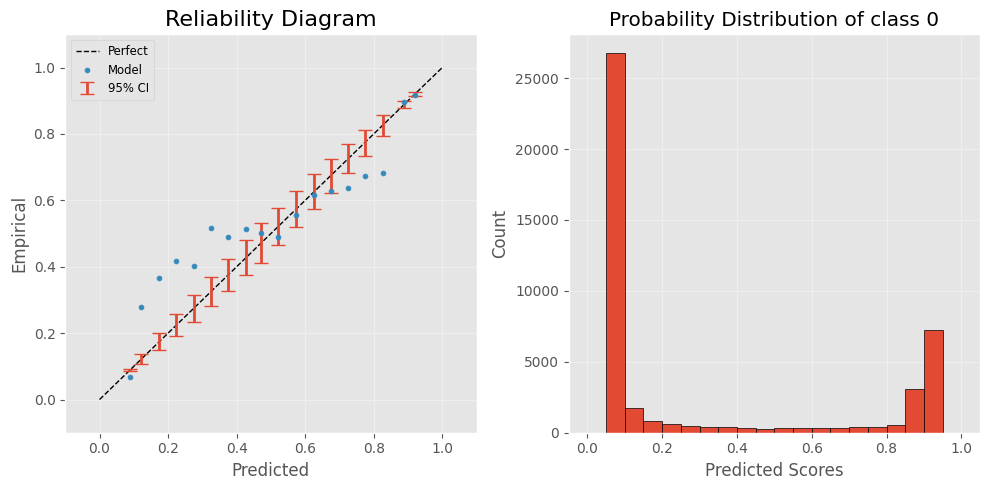

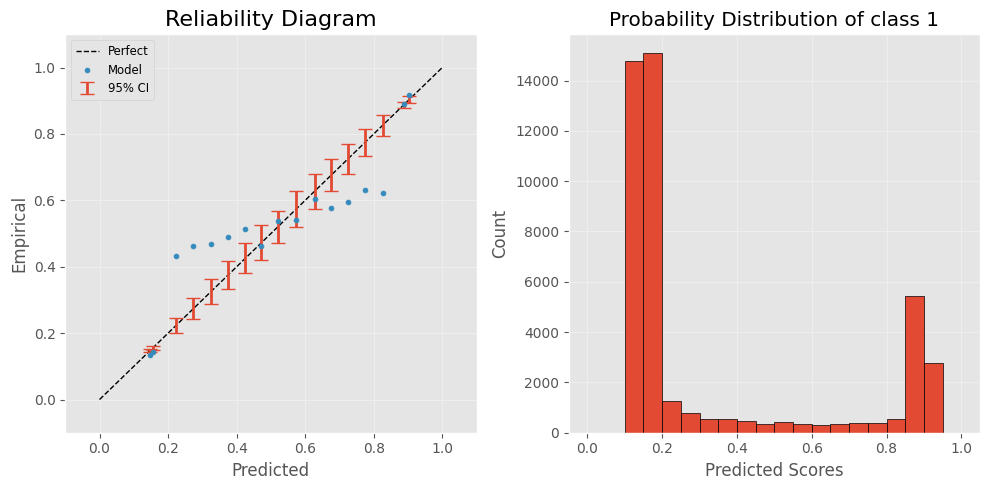

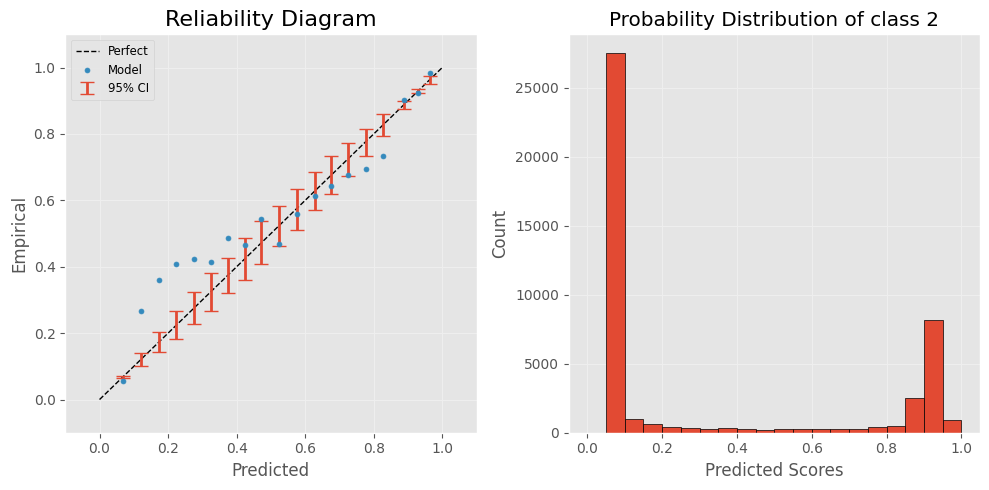

time: 1.61 s (started: 2024-08-14 18:27:53 +01:00)


In [84]:
# Plot reliability diagrams for each class
# we use the test_probs and not the hard predictions
for i in range(decision_function_scores_test.shape[1]):
    fig = plt.figure(figsize=(10, 5)) 
    mli.plot_reliability_diagram(y_test == i, pp_model_test_probs[:, i], show_histogram=True)
    plt.title(f'Probability Distribution of class {i}')
    plt.tight_layout()
    
plt.show()

## Calibrating model

### Method 1: Platt Scaling

In [85]:
from sklearn.linear_model import LogisticRegression

# Fit Platt scaling (logistic calibration)
# the big C nubmber is to unregularize the model (simply to turn-off the regularization)
lr = LogisticRegression(C=99_999_999_999, solver='lbfgs', n_jobs=-1)
lr.fit(pp_model_test_probs, y_test)

LogisticRegression(C=99999999999, n_jobs=-1)

time: 6.03 s (started: 2024-08-14 18:27:55 +01:00)


In [86]:
# get the calibration-set predictions from PassiveAggressiveClassifier
calib_preds = PA_pipeline.decision_function(X_calib)

# Get the predicted "probabilities" (membership probabilities)
pp_model_calib_probs = np.zeros_like(calib_preds)

for i in range(calib_preds.shape[1]):
    pp_model.fit(calib_preds[:, [i]], y_calib == i)
    pp_model_calib_probs[:, i] = pp_model.predict_proba(calib_preds[:, [i]])[:, 1]

time: 19.3 s (started: 2024-08-14 18:28:01 +01:00)


In [87]:
# calibrated calibration-set probabilistic predictions
calib_preds_calibrated = lr.predict_proba(pp_model_calib_probs)

time: 0 ns (started: 2024-08-14 18:28:20 +01:00)


#### Calibrated model: Evaluation

Evaluate our model on testset

In [88]:
# Evaluate the model
hard_preds_calib = PA_pipeline.predict(X_calib)
print(f'Accuracy: {accuracy_score(y_calib, hard_preds_calib)}')
print(f'Log-Loss: {log_loss(y_calib, calib_preds_calibrated)}')

print(classification_report(y_calib, hard_preds_calib))

Accuracy: 0.7964352720450282
Log-Loss: 0.5333445992411973
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2140
           1       0.75      0.73      0.74      2152
           2       0.84      0.86      0.85      2104

    accuracy                           0.80      6396
   macro avg       0.80      0.80      0.80      6396
weighted avg       0.80      0.80      0.80      6396

time: 1.25 s (started: 2024-08-14 18:28:20 +01:00)


#### Calibrated model: Reliability diagrams

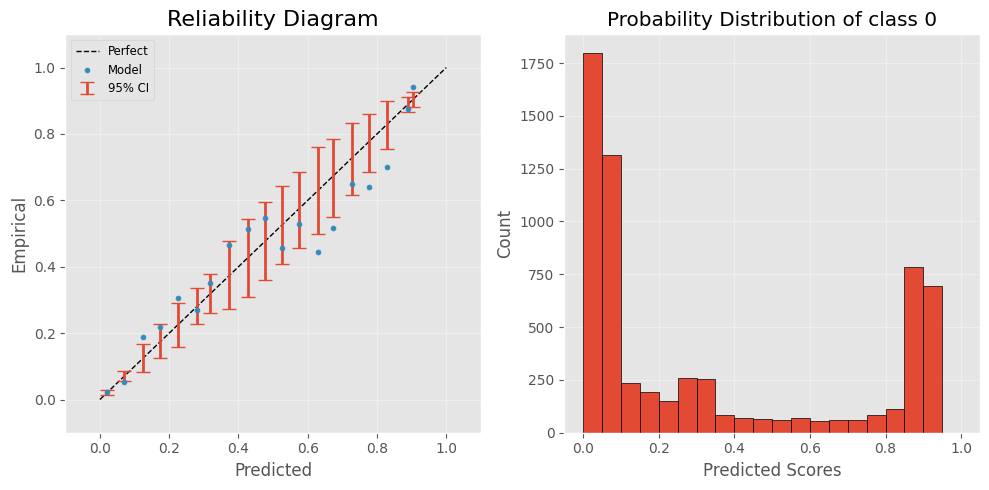

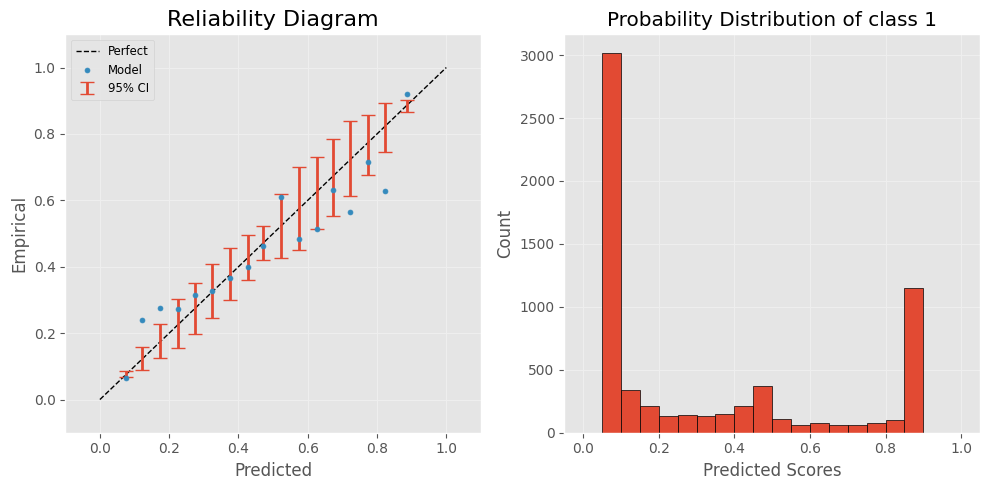

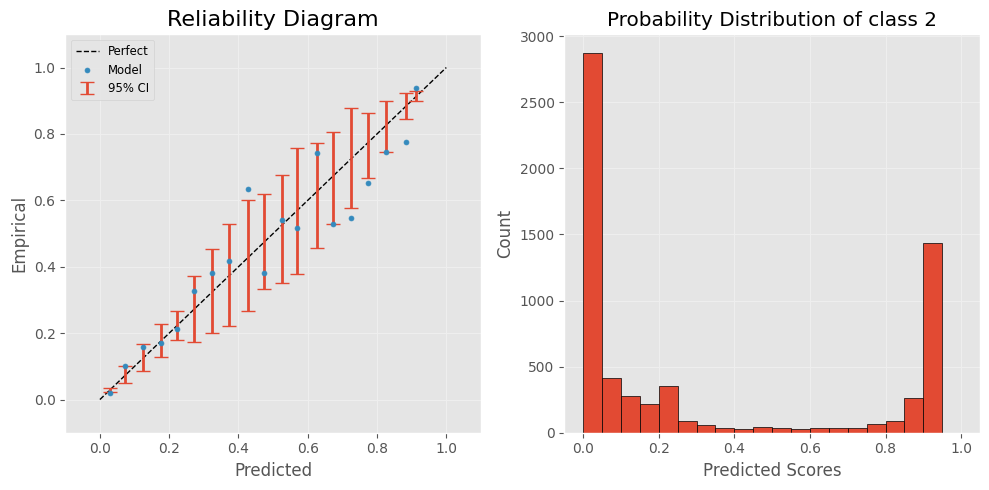

time: 1.59 s (started: 2024-08-14 18:28:21 +01:00)


In [89]:
# Plot reliability diagrams for each class
for i in range(pp_model_calib_probs.shape[1]):
    fig = plt.figure(figsize=(10, 5)) 
    mli.plot_reliability_diagram(y_calib == i, calib_preds_calibrated[:, i], show_histogram=True)
    plt.title(f'Probability Distribution of class {i}')
    plt.tight_layout()
    
plt.show()

#### Calibrated model: Testing

##### Probabilities comparaison

In [90]:
uncal_pred = PA_pipeline.decision_function(cleaned_reviews)

# Get the predicted "probabilities" (membership probabilities)
uncal_prob = np.zeros_like(uncal_pred)

for i in range(uncal_pred.shape[1]):
    pp_model.fit(uncal_pred[:, [i]], np.array(scores) == i)
    uncal_prob[:, i] = pp_model.predict_proba(uncal_pred[:, [i]])[:, 1]

time: 16 ms (started: 2024-08-14 18:28:23 +01:00)


In [91]:
print('Uncalibrated Prob:')
pd.DataFrame(uncal_prob)

Uncalibrated Prob:


,0,1,2
0,0.103112,0.106937,0.832970
1,0.099005,0.828728,0.128555
2,0.814299,0.076857,0.106237
3,0.115162,0.085599,0.841800
4,0.115162,0.835627,0.128555
5,0.806922,0.106093,0.106128
6,0.098933,0.098261,0.844095
7,0.106908,0.828728,0.116377
8,0.104109,0.083217,0.832987
9,0.806957,0.107091,0.105079


time: 15 ms (started: 2024-08-14 18:28:23 +01:00)


In [92]:
cal_prob = lr.predict_proba(uncal_prob)
print('Calibrated Prob:')
pd.DataFrame(cal_prob)

Calibrated Prob:


,0,1,2
0,0.029819,0.082764,0.887417
1,0.080024,0.851574,0.068403
2,0.874844,0.094499,0.030657
3,0.030236,0.076502,0.893262
4,0.082924,0.851293,0.065783
5,0.864847,0.104021,0.031132
6,0.027895,0.077502,0.894603
7,0.083267,0.852003,0.064729
8,0.029974,0.077556,0.892470
9,0.864846,0.104192,0.030962


time: 0 ns (started: 2024-08-14 18:28:23 +01:00)


##### Evaluation

In [93]:
hard_preds_sample_uncalib = PA_pipeline.predict(reviews)
hard_preds_sample_calib = np.argmax(cal_prob, axis=1)

time: 16 ms (started: 2024-08-14 18:28:23 +01:00)


In [94]:
# Evaluate the model
print('Uncalibrated model:')
print(f'Accuracy: {accuracy_score(scores, hard_preds_sample_uncalib)}')
print(f'Log-Loss: {log_loss(scores, uncal_prob)}')

Uncalibrated model:
Accuracy: 1.0
Log-Loss: 0.2258423427972481
time: 16 ms (started: 2024-08-14 18:28:23 +01:00)


In [95]:
# Evaluate the model
print('Calibrated model:')
print(f'Accuracy: {accuracy_score(scores, hard_preds_sample_calib)}')
print(f'Log-Loss: {log_loss(scores, cal_prob)}')

Calibrated model:
Accuracy: 1.0
Log-Loss: 0.13634020012939715
time: 15 ms (started: 2024-08-14 18:28:23 +01:00)


### Method 2: SplineCalib 

In [96]:
calib_mc = mli.SplineCalib(unity_prior=False)
calib_mc.fit(pp_model_test_probs, y_test, verbose=True)

# calibrated calibration-set probabilistic predictions 
calib_preds_calibrated_spl = calib_mc.calibrate(pp_model_calib_probs)

Calibrating Class 0
Calibrating Class 1
Calibrating Class 2
time: 26.2 s (started: 2024-08-14 18:28:23 +01:00)


#### Calibrated model: Evaluation

In [97]:
# Evaluate the model
hard_preds_calib_spl = PA_pipeline.predict(X_calib) #np.argmax(calib_preds_calibrated_spl, axis=1)
print(f'Accuracy: {accuracy_score(y_calib, hard_preds_calib_spl)}')
print(f'Log-Loss: {log_loss(y_calib, calib_preds_calibrated_spl)}')

print(classification_report(y_calib, hard_preds_calib_spl))

Accuracy: 0.7964352720450282
Log-Loss: 0.5610692328546079
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2140
           1       0.75      0.73      0.74      2152
           2       0.84      0.86      0.85      2104

    accuracy                           0.80      6396
   macro avg       0.80      0.80      0.80      6396
weighted avg       0.80      0.80      0.80      6396

time: 1.44 s (started: 2024-08-14 18:28:49 +01:00)


#### Calibrated model: Reliability diagrams

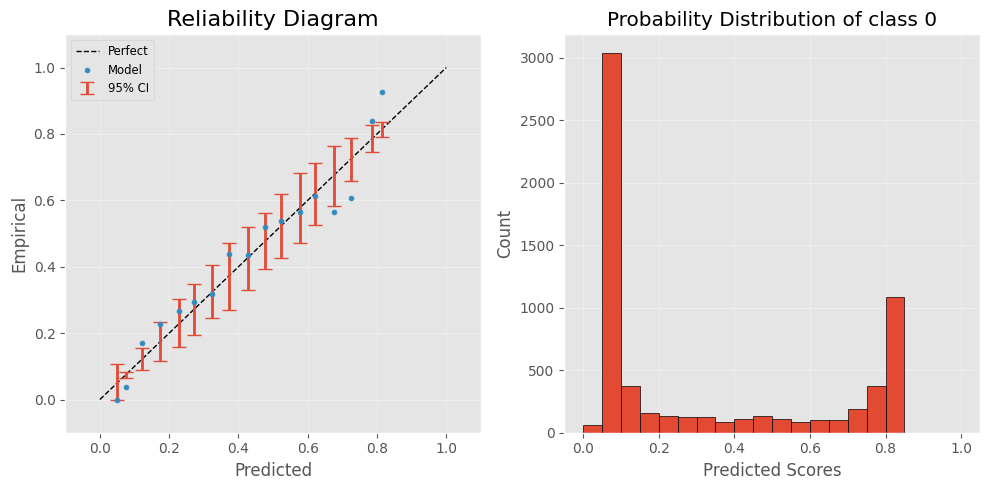

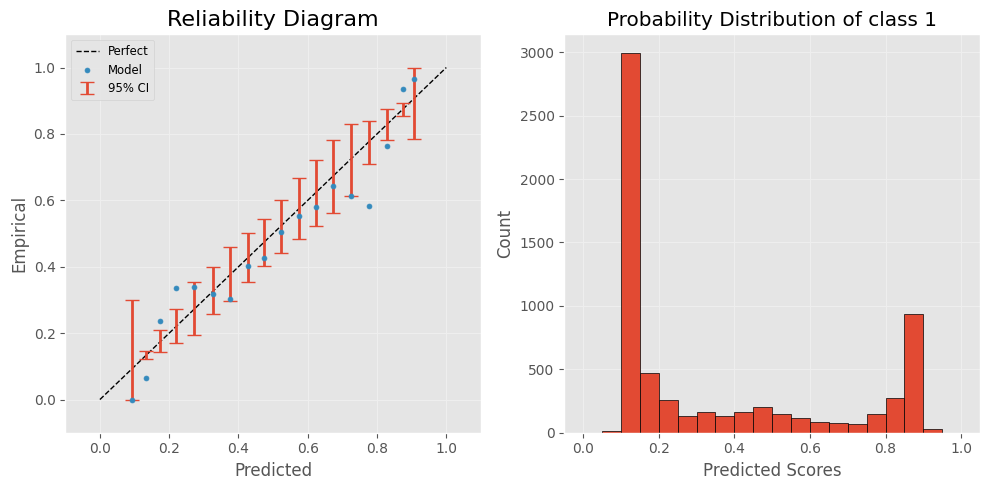

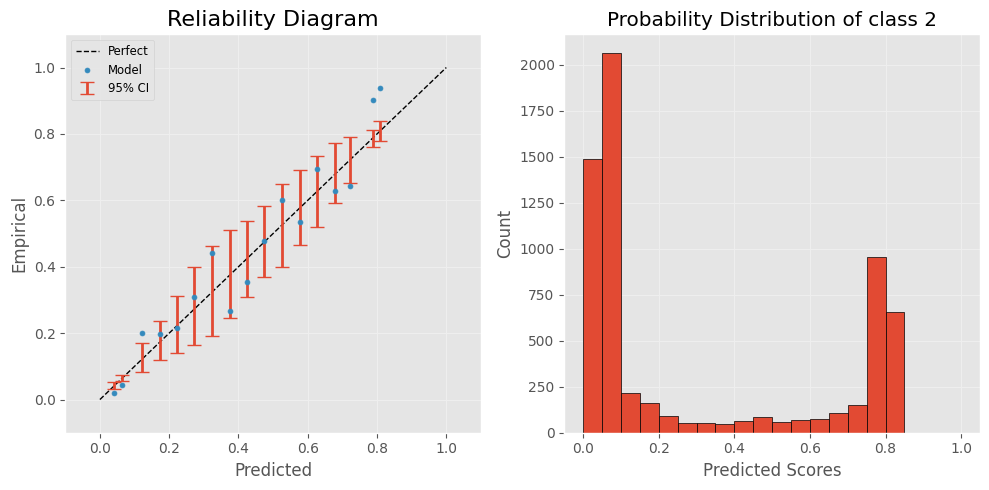

time: 4.69 s (started: 2024-08-14 18:28:51 +01:00)


In [98]:
# Plot reliability diagrams for each class
for i in range(calib_preds_calibrated_spl.shape[1]):
    fig = plt.figure(figsize=(10, 5)) 
    mli.plot_reliability_diagram(y_calib == i, calib_preds_calibrated_spl[:, i], show_histogram=True)
    plt.title(f'Probability Distribution of class {i}')
    plt.tight_layout()
    
plt.show()

#### Calibrated model: Testing

##### Probabilities comparaison 

Uncalibrated Vs. Calibrated Probabilities for our test data

In [99]:
print('Uncalibrated Prob:')
pd.DataFrame(uncal_prob)

Uncalibrated Prob:


,0,1,2
0,0.103112,0.106937,0.832970
1,0.099005,0.828728,0.128555
2,0.814299,0.076857,0.106237
3,0.115162,0.085599,0.841800
4,0.115162,0.835627,0.128555
5,0.806922,0.106093,0.106128
6,0.098933,0.098261,0.844095
7,0.106908,0.828728,0.116377
8,0.104109,0.083217,0.832987
9,0.806957,0.107091,0.105079


time: 16 ms (started: 2024-08-14 18:28:55 +01:00)


In [100]:
cal_prob_spl = calib_mc.predict_proba(uncal_prob)
print('Calibrated Prob:')
pd.DataFrame(cal_prob_spl)

Calibrated Prob:


,0,1,2
0,0.112466,0.028022,0.859512
1,0.104495,0.704253,0.191252
2,0.848620,0.005672,0.145707
3,0.138028,0.008929,0.853043
4,0.135069,0.684867,0.180064
5,0.827258,0.028319,0.144423
6,0.102923,0.018290,0.878787
7,0.124175,0.711721,0.164104
8,0.116843,0.008104,0.875053
9,0.828140,0.029710,0.142150


time: 16 ms (started: 2024-08-14 18:28:55 +01:00)


##### Evaluation

In [101]:
hard_preds_sample_uncalib = np.argmax(uncal_prob, axis=1)
hard_preds_sample_calib_spl = np.argmax(cal_prob_spl, axis=1)

time: 0 ns (started: 2024-08-14 18:28:56 +01:00)


In [102]:
# Evaluate the model
print('Uncalibrated model:')
print(f'Accuracy: {accuracy_score(scores, hard_preds_sample_uncalib)}')
print(f'Log-Loss: {log_loss(scores, uncal_prob)}')

Uncalibrated model:
Accuracy: 1.0
Log-Loss: 0.2258423427972481
time: 15 ms (started: 2024-08-14 18:28:56 +01:00)


In [103]:
# Evaluate the model
print('Calibrated model:')
print(f'Accuracy: {accuracy_score(scores, hard_preds_sample_calib_spl)}')
print(f'Log-Loss: {log_loss(scores, cal_prob_spl)}')

Calibrated model:
Accuracy: 1.0
Log-Loss: 0.2184592170457668
time: 0 ns (started: 2024-08-14 18:28:56 +01:00)


# Model Evaluation

Evaluate our model on testset

In [104]:
X_t = cleaned_reviews
y_t = pd.Series(scores).astype(int)

# Predicting
predictions = PA_pipeline.predict(X_t)

# Get the raw decision function scores
X_t_scores = PA_pipeline.decision_function(X_t)

time: 15 ms (started: 2024-08-14 18:28:56 +01:00)


In [105]:
# Get the predicted "probabilities" (membership probabilities)
pp_model_probs = np.zeros_like(X_t_scores)

for i in range(X_t_scores.shape[1]):
    pp_model.fit(X_t_scores[:, [i]], y_t == i)
    pp_model_probs[:, i] = pp_model.predict_proba(X_t_scores[:, [i]])[:, 1]

time: 16 ms (started: 2024-08-14 18:28:56 +01:00)


In [106]:
predictions_proba = pp_model_probs

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_true=y_t, y_pred=predictions)}')
print(f'Log-Loss: {log_loss(y_true=y_t, y_pred=predictions_proba)}')

print(classification_report(y_true=y_t, y_pred=predictions))

Accuracy: 1.0
Log-Loss: 0.23860311070195755
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

time: 16 ms (started: 2024-08-14 18:28:56 +01:00)


# Model reusability

## Store model

In [107]:
import joblib

model_path = './model/'

# Create the directory if it does not exist
if not os.path.exists(model_path):
    os.makedirs(model_path)

# Save the pipeline to disk for reusability
pipeline_model = os.path.join(model_path, "PA_pipeline.pkl")
joblib.dump(PA_pipeline, pipeline_model)

# Save the probabilities predictions model to disk for reusability
proba_pred_model = os.path.join(model_path, "Proba_pred_model.pkl")
joblib.dump(pp_model, proba_pred_model)

# Save the calibrated model to disk for reusability
platt_calibration_model = os.path.join(model_path, "Platt_calibration_model.pkl")
joblib.dump(lr, platt_calibration_model);

time: 18.7 s (started: 2024-08-14 18:28:56 +01:00)


## Load model

In [108]:
uncalib_model = joblib.load(pipeline_model)
proba_model = joblib.load(proba_pred_model)
calib_model = joblib.load(platt_calibration_model)

time: 9.42 s (started: 2024-08-14 18:29:15 +01:00)


### Testing model reusability

In [109]:
reviews_2 = [
    "The pasta was overcooked and tasteless, making the entire dish unenjoyable. The sauce lacked any depth of flavor and felt more like a watery mix of tomatoes. I was very disappointed and won't be ordering from here again.",
    "The service was decent, but the food was nothing special. The appetizers were bland and the main course lacked the seasoning to make it memorable. However, the dessert was the saving grace, with a rich and creamy texture that was quite satisfying.",
    "Amazing flavors and perfect seasoning! Every bite of the roasted chicken was a delightful experience. The sides were equally impressive, especially the garlic mashed potatoes. This was by far the best meal I've had in a long time, and I will definitely be returning soon.",
    "The dessert was okay, but the main course was a letdown. The steak was overcooked and the vegetables were soggy. It was not the fine dining experience I was expecting, although the ambiance was pleasant and the staff were attentive.",
    "Great ambiance and friendly staff made the evening enjoyable. The steak was cooked to perfection, juicy and tender, and the accompanying wine selection was excellent. It was a fantastic dining experience that I would highly recommend.",
    "The soup was too salty and the bread was stale, making it hard to enjoy the starter. The main course didn't fare much better, with the chicken being dry and over-seasoned. Overall, it was a disappointing meal that I wouldn't recommend.",
    "I had an average experience at this restaurant. The atmosphere was nice and the staff were polite, but the food was just mediocre. The pasta was underwhelming, and while the dessert was tasty, it wasn't enough to make up for the rest of the meal.",
    "Excellent presentation and delicious taste! The seafood platter was fresh and flavorful, with a great variety of options. The service was prompt and courteous, adding to a wonderful dining experience. I highly recommend this place for seafood lovers.",
    "The salad was fresh and the dressing was delightful, providing a great start to the meal. The main course, a perfectly cooked salmon, was equally impressive. The flavors were well-balanced and the portions were generous. This is a place I would visit again.",
    "Not impressed with the quality of the ingredients used. The vegetables in the stir-fry were limp and lacked flavor, and the sauce was too sweet for my taste. The overall experience felt like a fast-food joint rather than a fine dining restaurant."
]

scores_2 = [0, 1, 2, 1, 2, 0, 1, 2, 2, 0]


time: 0 ns (started: 2024-08-14 18:29:24 +01:00)


In [110]:
reviews_2 = pd.DataFrame(reviews_2, columns=['reviews'])

time: 0 ns (started: 2024-08-14 18:29:24 +01:00)


In [111]:
cleaned_reviews_2 = reviews_2.reviews.apply(clean_document)

time: 0 ns (started: 2024-08-14 18:29:24 +01:00)


In [112]:
uncal_pred_2 = uncalib_model.decision_function(cleaned_reviews_2)

# Get the predicted "probabilities" (membership probabilities)
uncal_prob_2 = np.zeros_like(uncal_pred_2)

for i in range(uncal_pred_2.shape[1]):
    proba_model.fit(uncal_pred_2[:, [i]], np.array(scores_2) == i)
    uncal_prob_2[:, i] = proba_model.predict_proba(uncal_pred_2[:, [i]])[:, 1]

time: 0 ns (started: 2024-08-14 18:29:24 +01:00)


In [113]:
print('Uncalibrated Prob:')
pd.DataFrame(uncal_prob_2)

Uncalibrated Prob:


,0,1,2
0,0.049755,0.098809,0.133909
1,0.389354,0.801295,0.110111
2,0.363255,0.126624,0.886102
3,0.301590,0.690165,0.120788
4,0.363320,0.126868,0.889921
5,0.051081,0.155429,0.123796
6,0.363378,0.638701,0.133963
7,0.363378,0.133282,0.854352
8,0.395764,0.112927,0.854352
9,0.273077,0.422394,0.111282


time: 16 ms (started: 2024-08-14 18:29:24 +01:00)


In [114]:
cal_prob_2 = calib_model.predict_proba(uncal_prob_2)
print('Calibrated Prob:')
pd.DataFrame(cal_prob_2)

Calibrated Prob:


,0,1,2
0,0.256620,0.416070,0.327311
1,0.208883,0.747071,0.044046
2,0.071078,0.090184,0.838737
3,0.203711,0.727385,0.068903
4,0.069974,0.089163,0.840863
5,0.245880,0.460778,0.293341
6,0.262596,0.665076,0.072328
7,0.080990,0.101398,0.817613
8,0.092489,0.097860,0.809650
9,0.310256,0.569216,0.120528


time: 15 ms (started: 2024-08-14 18:29:24 +01:00)


In [115]:
hard_preds_sample_uncalib_2 = uncalib_model.predict(cleaned_reviews_2)
hard_preds_sample_calib_2 = np.argmax(cal_prob_2, axis=1)

time: 0 ns (started: 2024-08-14 18:29:24 +01:00)


In [116]:
# Evaluate the model
print('Uncalibrated model:')
print(f'Accuracy: {accuracy_score(scores_2, hard_preds_sample_uncalib_2)}')
print(f'Log-Loss: {log_loss(scores_2, uncal_prob_2)}')

Uncalibrated model:
Accuracy: 0.9
Log-Loss: 0.8028428166620352
time: 0 ns (started: 2024-08-14 18:29:24 +01:00)


In [117]:
# Evaluate the model
print('Calibrated model:')
print(f'Accuracy: {accuracy_score(scores_2, hard_preds_sample_calib_2)}')
print(f'Log-Loss: {log_loss(scores_2, cal_prob_2)}')

Calibrated model:
Accuracy: 0.7
Log-Loss: 0.5712880174908113
time: 15 ms (started: 2024-08-14 18:29:24 +01:00)


# Conclusion

In this project, I conducted a sentiment analysis on Amazon Fine Food Reviews. The data was first cleaned using the NLTK toolkit, followed by down-sampling to prevent class imbalance bias. Reviews were mapped onto a 0-2 scale, with 0 representing negative, 1 neutral, and 2 positive sentiments. I initially trained a **random forest classifier**, achieving **70%** accuracy and a log loss of **1.09**. After calibration using **Platt scaling** and **spline-calib** methods, the log loss improved to **0.68** and **0.69**, respectively. I then applied a **passive-aggressive classifier**, which outperformed the random forest with **80%** accuracy and a log loss of **0.53** post-calibration. The final model, a calibrated passive-aggressive classifier, achieved an impressive **100%** accuracy and a log loss of **0.23** on a test set of generic reviews generated by ChatGPT, demonstrating its effectiveness for sentiment prediction.

# References


1. **Data Sources**:
   - [Amazon Fine Food Reviews]. (2016). Retrieved from [kaggle.com](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)

2. **Technical Papers and Articles**:
   --Reference: Platt, J. (1999). Probabilistic outputs for support vector machines and comparison to regularized likelihood methods. Advances in Large Margin Classifiers (pp.61–74).

   - Lucena, B. Spline-based Probability Calibration. [arxiv.org](https://arxiv.org/abs/1809.07751)


3. **Books and Tutorials**:
   - Brian Lucena. (2020). Probability Calibration Workshop. [youtube.com](https://www.youtube.com/watch?v=QUXfYgGlwtU&list=LL&index=89).

4. **Official Documentations**:
   - RandomForestClassifier. [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
   - PassiveAgressiveClassifier. [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html)


5. **Libraries and Tools**:
   - Scikit-learn.
   - NLTK
   - Pandas.
   - NumPy.
   - Matplotlib.
   - Seaborn.

# About the Author


**Youssef Laouina** is a certified data scientist with expertise in Python, machine learning, and data analysis. He has a background in economics and has worked on projects addressing real-world problems through data-driven solutions.

Connect with Youssef:
- **Email**: [laouina.yusuf@gmail.com](mailto:laouina.yusuf@gmail.com)
- **LinkedIn**: [Youssef Laouina](https://www.linkedin.com/in/youssef-laouina)
- **GitHub**: [Youssef Laouina](https://github.com/youssef-laouina)